#   

# 作業目標:

    1. 藉由固定的 dataset, 來驗證不同loss function
    2. Dataset 的特性跟我們選用的loss function 對accrancy 的影響
    
    
# 作業重點: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate
    

# 導入必要的函數

In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


# 資料準備

In [2]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [3]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [4]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [5]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [7]:
model = Sequential()

In [8]:
#卷積層1

In [9]:
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [10]:
model.add(Dropout(rate=0.25))

In [11]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [12]:
#卷積層2與池化層2

In [13]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

In [14]:
model.add(Dropout(0.25))

In [15]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [16]:
#建立神經網路(平坦層、隱藏層、輸出層)

In [17]:
model.add(Flatten())
model.add(Dropout(rate=0.25))

In [18]:
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

In [19]:
model.add(Dense(10, activation='softmax'))

In [20]:
#檢查model 的STACK
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)             

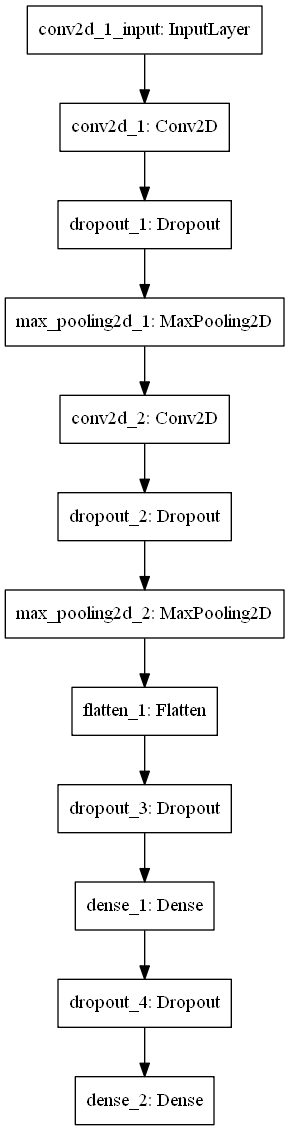

In [24]:
from keras.utils import plot_model
plot_model(model, to_file='Day71_modeling.png')

# 載入之前訓練的模型

In [25]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型 - categorical_crossentropy

In [26]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

'''
作業:
請分別選用 "MSE", "binary _crossentropy"
查看Train/test accurancy and loss rate
'''

'\n作業:\n請分別選用 "MSE", "binary _crossentropy"\n查看Train/test accurancy and loss rate\n'

In [27]:
train_history_cce= model.fit(x_img_train_normalize, y_label_train_OneHot,
                            validation_split= 0.25,
                            epochs= 15, batch_size= 128, verbose= 1)


Train on 37500 samples, validate on 12500 samples
Epoch 1/15
37500/37500 [==============================] - 6s 153us/step - loss: 2.1653 - accuracy: 0.2016 - val_loss: 2.0546 - val_accuracy: 0.2966
Epoch 2/15
37500/37500 [==============================] - 4s 100us/step - loss: 1.9512 - accuracy: 0.2996 - val_loss: 1.9521 - val_accuracy: 0.3378
Epoch 3/15
37500/37500 [==============================] - 4s 99us/step - loss: 1.8247 - accuracy: 0.3505 - val_loss: 1.8229 - val_accuracy: 0.3952
Epoch 4/15
37500/37500 [==============================] - 4s 98us/step - loss: 1.7225 - accuracy: 0.3863 - val_loss: 1.7420 - val_accuracy: 0.4198
Epoch 5/15
37500/37500 [==============================] - 4s 98us/step - loss: 1.6388 - accuracy: 0.4167 - val_loss: 1.6555 - val_accuracy: 0.4543
Epoch 6/15
37500/37500 [==============================] - 4s 98us/step - loss: 1.5691 - accuracy: 0.4371 - val_loss: 1.6103 - val_accuracy: 0.4696
Epoch 7/15
37500/37500 [==============================] - 4s 98us

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

def show_train_history(train_history, train_acc, test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_acc', 'val_acc'], loc= 'upper left')
    plt.show

def show_train_history_loss(train_history, train_loss, test_loss):
    plt.plot(train_history.history[train_loss])
    plt.plot(train_history.history[test_loss])
    plt.title('Train History')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train_loss', 'val_loss'], loc= 'upper left')
    plt.show

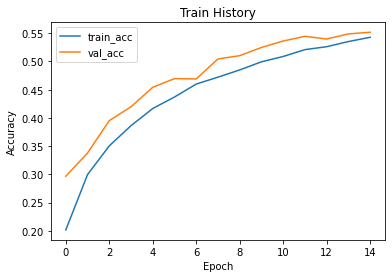

In [39]:
show_train_history(train_history_cce, 'accuracy', 'val_accuracy')

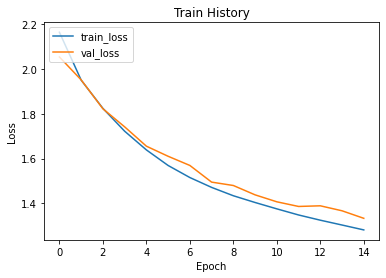

In [40]:
show_train_history_loss(train_history_cce, 'loss', 'val_loss')

# 訓練模型 - MSE

In [30]:
model.compile(loss='MSE', optimizer='sgd', metrics=['accuracy'])

In [31]:
train_history_mse= model.fit(x_img_train_normalize, y_label_train_OneHot,
                            validation_split=0.25,
                            epochs=15, batch_size= 128, verbose= 1)

Train on 37500 samples, validate on 12500 samples
Epoch 1/15
37500/37500 [==============================] - 4s 101us/step - loss: 0.0581 - accuracy: 0.5526 - val_loss: 0.0604 - val_accuracy: 0.5696
Epoch 2/15
37500/37500 [==============================] - 4s 95us/step - loss: 0.0578 - accuracy: 0.5567 - val_loss: 0.0604 - val_accuracy: 0.5678
Epoch 3/15
37500/37500 [==============================] - 4s 95us/step - loss: 0.0579 - accuracy: 0.5556 - val_loss: 0.0604 - val_accuracy: 0.5691
Epoch 4/15
37500/37500 [==============================] - 4s 95us/step - loss: 0.0576 - accuracy: 0.5572 - val_loss: 0.0603 - val_accuracy: 0.5683
Epoch 5/15
37500/37500 [==============================] - 4s 94us/step - loss: 0.0575 - accuracy: 0.5584 - val_loss: 0.0602 - val_accuracy: 0.5678
Epoch 6/15
37500/37500 [==============================] - 4s 94us/step - loss: 0.0576 - accuracy: 0.5573 - val_loss: 0.0601 - val_accuracy: 0.5694
Epoch 7/15
37500/37500 [==============================] - 4s 94us/s

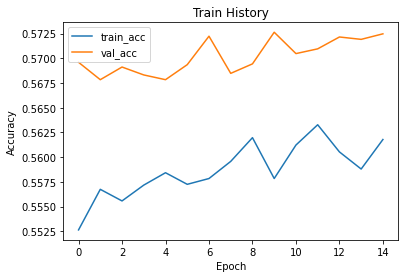

In [32]:
show_train_history(train_history_mse, 'accuracy', 'val_accuracy')

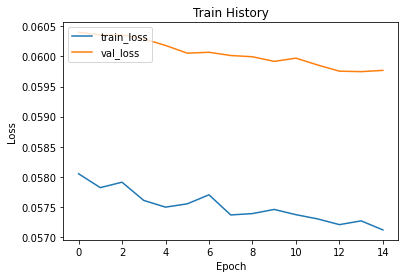

In [41]:
show_train_history_loss(train_history_mse, 'loss', 'val_loss')

# 訓練模型 - binary_crossentropy

In [33]:
model.compile(loss= 'binary_crossentropy', optimizer= 'sgd', metrics=['accuracy'])

In [34]:
train_history_BiCE= model.fit(x_img_train_normalize, y_label_train_OneHot,
                             validation_split=0.25,
                             epochs=15, batch_size= 128, verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 37500 samples, validate on 12500 samples
Epoch 1/15
37500/37500 [==============================] - 4s 102us/step - loss: 0.1936 - accuracy: 0.9240 - val_loss: 0.2039 - val_accuracy: 0.9193
Epoch 2/15
37500/37500 [==============================] - 4s 96us/step - loss: 0.1932 - accuracy: 0.9243 - val_loss: 0.2040 - val_accuracy: 0.9191
Epoch 3/15
37500/37500 [==============================] - 4s 96us/step - loss: 0.1932 - accuracy: 0.9239 - val_loss: 0.2034 - val_accuracy: 0.9194
Epoch 4/15
37500/37500 [==============================] - 4s 96us/step - loss: 0.1924 - accuracy: 0.9240 - val_loss: 0.2034 - val_accuracy: 0.9192
Epoch 5/15
37500/37500 [==============================] - 4s 96us/step - loss: 0.1926 - accuracy: 0.9242 - val_loss: 0.2026 - val_accuracy: 0.9194
Epoch 6/15
37500/37500 [==============================] - 4s 97us/step - loss: 0.1919 - accuracy: 0.9245 - val_loss: 0.2

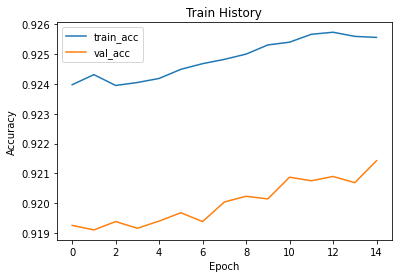

In [35]:
show_train_history(train_history_BiCE, 'accuracy', 'val_accuracy')

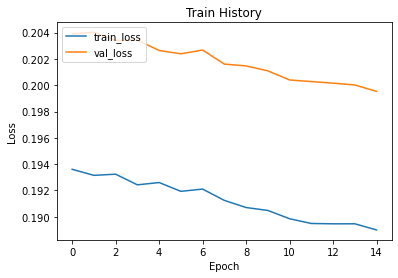

In [42]:
show_train_history_loss(train_history_BiCE, 'loss', 'val_loss')